# Fit the data to an Adaboost model

##### We will fit the data to an Adaboost model, and try to plot the features importances based on which the model makes the predictions.

### We know

- We know AdaBoost assigns feature importance based on the total contribution of that feature across all weak classifiers
- Features that are frequently selected by the weak classifiers and have high discriminatory power will have higher importance
- If AdaBoost identifies a feature as important, it likely has a meaningful relationship with the target, but not necessarily a direct correlation in the statistical sense.

### We will observe

After fitting the data to the model, we are able to see that the model considers Stress Level and Daily Steps, the two most important features based on which it makes predictions.

Back in our exploratory_data_analysis.ipynb file, we observed correlations between some variables.
Some of them were:

Physical Activity Level & Daily Steps,
Quality of Sleep & Stress Level
Sleep Duration & Stress Level
Stress Level & Sleep Disorder

The model that we train confirms that our assumption that these variables are connected, is correct and it shows that it counts on some of them, to be able to make decisions.






In [24]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.loc[df['Sleep Disorder'].isna(), 'Sleep Disorder'] = 'No Disorder'

df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [25]:

df.loc[df['BMI Category'] == 'Normal Weight', 'BMI Category'] = 'Normal'



In [26]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/',expand=True)

# df.drop(df['Blood Pressure'],axis=1)
df.drop('Blood Pressure', axis=1, inplace=True)
df.drop('Person ID',axis=1,inplace=True)


In [27]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

df_dummies = pd.get_dummies(df,columns=['Gender','Occupation','BMI Category'],drop_first=True)

df_dummies['Sleep_Disorder'] = le.fit_transform(df_dummies['Sleep Disorder'])

df_dummies.drop('Sleep Disorder',axis=1,inplace=True)


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = df_dummies.drop('Sleep_Disorder',axis=1)

feature_names = X.columns

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df_dummies['Sleep_Disorder']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state=101)

In [29]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
print("Accuracy (Adaboost):", accuracy_score(y_test, y_pred_adaboost))
print("Classification Report (Adaboost):\n", classification_report(y_test, y_pred_adaboost, target_names=le.classes_))




Accuracy (Adaboost): 0.868421052631579
Classification Report (Adaboost):
               precision    recall  f1-score   support

    Insomnia       1.00      0.70      0.82        10
 No Disorder       0.83      1.00      0.90        19
 Sleep Apnea       0.88      0.78      0.82         9

    accuracy                           0.87        38
   macro avg       0.90      0.83      0.85        38
weighted avg       0.88      0.87      0.86        38



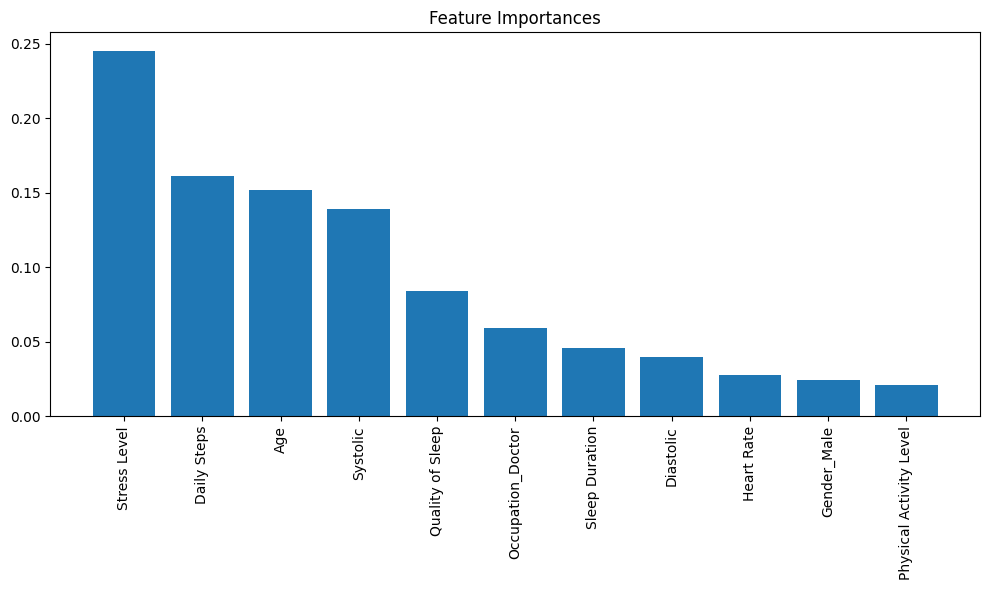

In [30]:
importances = adaboost_model.feature_importances_

mask = importances > 0
importances = importances[mask]

# Get feature names
feature_names = df_dummies.drop(columns=['Sleep_Disorder']).columns

# Sort feature importances for better visualization
indices = np.argsort(importances)[::-1] # Sort in descending orde




plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()